In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


### Funções

In [3]:
#FUNÇÃO PARA RECEBER INTERVALOS
def definir_bins(*args):
    
    return bins

#FUNÇÃO PARA RECEBER OS VALORES DAS COLUNAS
def setar_valores_da_lista(*args):
    
    return valores

#FUNÇÃO PARA SUBSTITUIR OS REGISTROS DAS COLUNAS E DIMINUIR O TOTAL DO "value_counts"
def processar_coluna(df, nome_coluna):
    df[nome_coluna] = df[nome_coluna].astype(float) 
    bins = definir_bins()  
    valores = setar_valores_da_lista()
    df[nome_coluna] = pd.cut(df[nome_coluna], bins=bins, labels=valores) 
    return df




In [5]:
#FUNÇÃO DE SUBSTITUIÇÃO DE VALORES NULOS
def valor_nulo_proporcao(df, nome_coluna):
    # Substituindo os valores nulos de acordo com as proporções
    null_indices = df[nome_coluna].isnull()
    for value, proportion in replacement_values.items():
        num_to_replace = int(null_indices.sum() * proportion)
        if num_to_replace > 0:
            replace_indices = np.random.choice(null_indices.index[null_indices], num_to_replace, replace=False)
            df.loc[replace_indices, nome_coluna] = value
    return df        

In [6]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_colunas_com_valores_nulos(df):
        
    # Calcula o número de valores nulos em cada coluna
    valores_nulos_por_coluna = df.isnull().sum()
    
    # Filtra as colunas com mais de 3000 valores nulos
    colunas_com_valores_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna > 1]
    
    # Exibe o total de valores nulos para as colunas que têm mais de 3000 valores nulos
    print("Total de valores nulos para as colunas com valores nulos:")
    print(colunas_com_valores_nulos)



In [7]:
def plotar_distribuicao_percentual(df, coluna):
    # Calcula a distribuição percentual de cada valor na coluna especificada
    distribuicao = df[coluna].value_counts(normalize=True) * 100
    
    # Plota o gráfico da distribuição percentual
    distribuicao.plot(kind='bar')
    plt.title(f'Distribuição Percentual da Coluna {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Porcentagem')
    plt.show()

### Importando a Base

In [2]:
df = pd.read_csv("Bases/base_filtrada.csv")

In [11]:
df = df[df['Q092'].notna()]

### Verificando quantidade de valores nulos

In [13]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
E01602    9272
E017      8867
D00901    4561
P00104     747
P00404     747
dtype: int64


In [14]:
df['E01602'].max()

120000.0

In [ ]:
df['E01602'].value_counts()

E01602
998.0      294
2000.0     200
1500.0     191
1000.0     179
1200.0     178
          ... 
1384.0       1
22000.0      1
2380.0       1
2950.0       1
1152.0       1
Name: count, Length: 312, dtype: int64

### Olhando graficamente colunas especificas

In [16]:
valores_peso = df['P00104'].value_counts()

In [17]:
valores_altura = df['P00404'].value_counts()

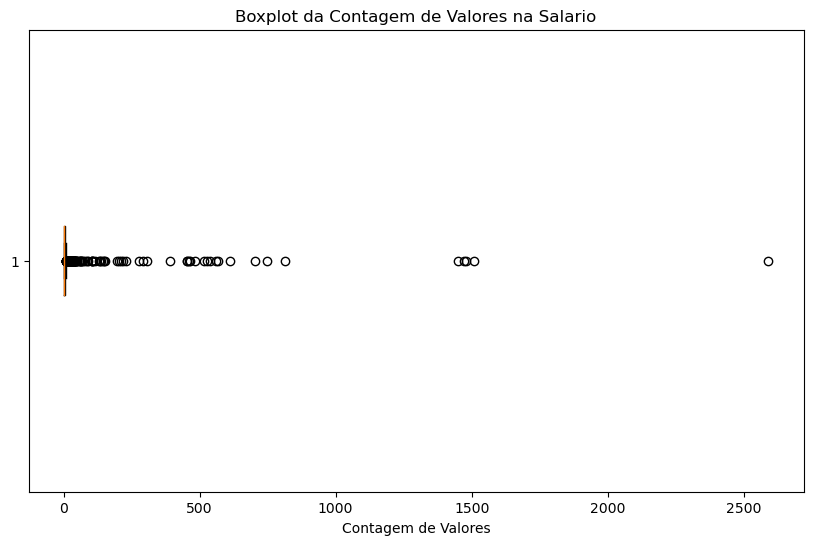

In [19]:
# Contar valores em 'E01602'
value_counts = df['E01602'].value_counts()



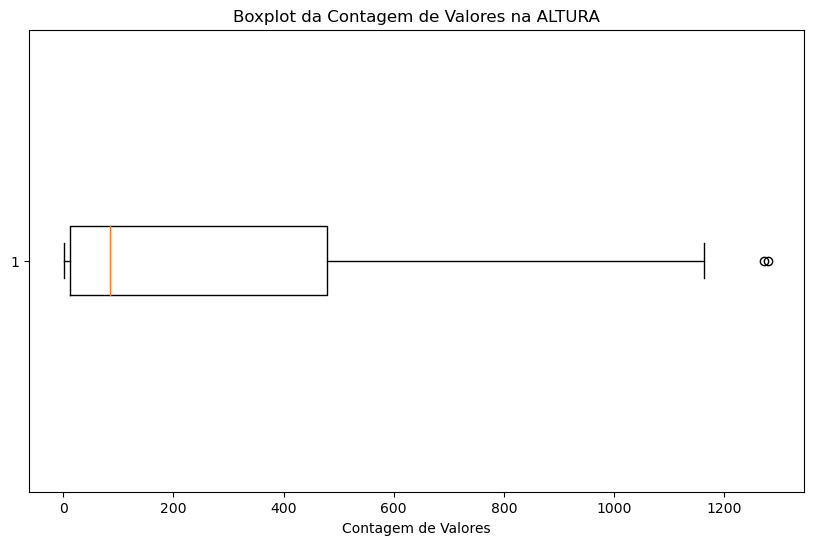

In [22]:
# Criar um boxplot para verificar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(valores_peso, vert=False)

plt.xlabel('Contagem de Valores')
plt.title('Boxplot da Contagem de Valores na ALTURA')
plt.show()

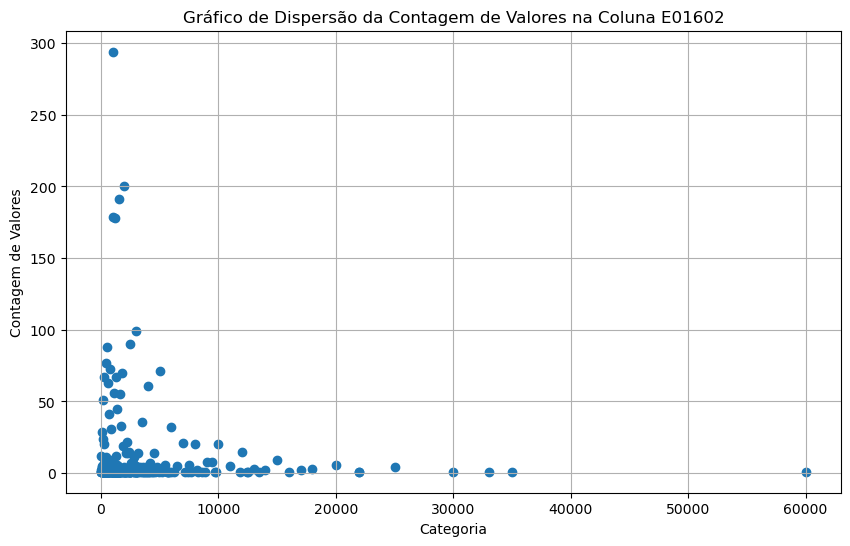

In [ ]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(value_counts.index, value_counts.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

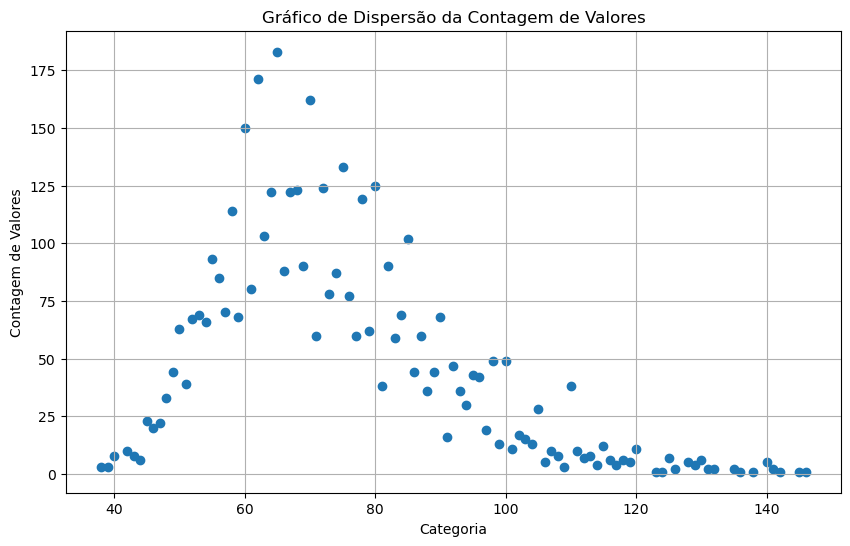

In [ ]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_peso.index, valores_peso.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

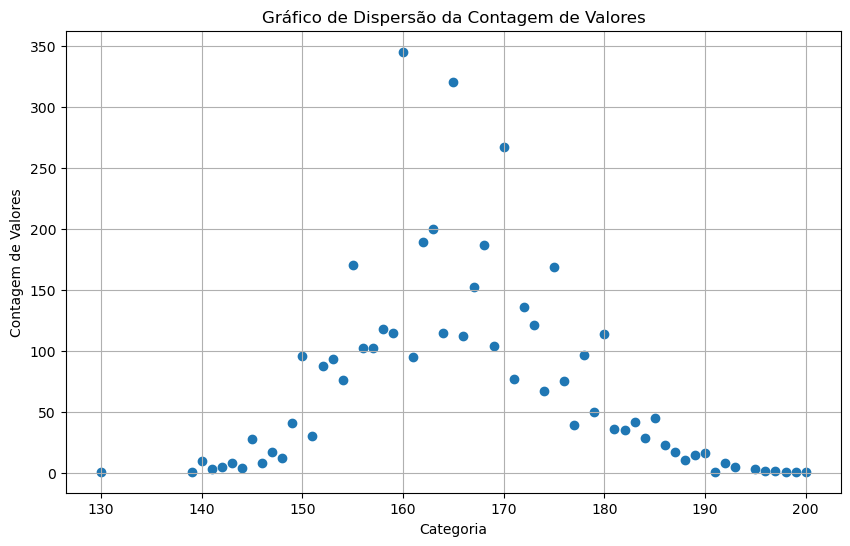

In [ ]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_altura.index, valores_altura.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

### Tratando as colunas especificas com dados nulos

In [34]:
# Usando NumPy
std_dev_numpy = np.std(df['E01602'], ddof=1)  # ddof=1 para amostra
print(f"Desvio Padrão (NumPy): {std_dev_numpy:.2f}")

Desvio Padrão (NumPy): 2644.93


In [24]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
#identificando dados faltantes
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
E01602    9272
E017      8867
D00901    4561
P00104     747
P00404     747
dtype: int64


In [33]:
df['E01602'].mode()

0    998.0
Name: E01602, dtype: float64

In [35]:
df['E01602'].value_counts()

E01602
998.0      2590
1500.0     1507
2000.0     1479
1200.0     1473
1000.0     1451
           ... 
27303.0       1
903.0         1
10400.0       1
2094.0        1
1318.0        1
Name: count, Length: 884, dtype: int64

In [29]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
E01602    9272
E017      8867
D00901    4561
P00104     747
P00404     747
dtype: int64


In [30]:
df.shape

(33321, 48)

#### Coluna Salario

In [42]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {2000: 0.2, 998: 0.2, 1200: 0.2, 1500: 0.2, 1000: 0.2}
 
valor_nulo_proporcao(df, 'E01602')

print(df['E01602'].value_counts())

exibir_colunas_com_valores_nulos(df)

E01602
998.0      4039
1500.0     3719
1200.0     3224
3000.0     2669
2000.0     2582
           ... 
27303.0       1
903.0         1
10400.0       1
2094.0        1
1318.0        1
Name: count, Length: 884, dtype: int64
Total de valores nulos para as colunas com valores nulos:
E017      8867
D00901    4561
P00104     747
P00404     747
dtype: int64


#### Coluna Horas trabalhadas

In [43]:
df['E017'].value_counts()

E017
40.0     6927
44.0     4489
48.0     1984
30.0     1710
20.0     1382
         ... 
88.0        1
95.0        1
106.0       1
92.0        1
82.0        1
Name: count, Length: 97, dtype: int64

In [48]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {40:0.4, 48:0.3, 30:0.3}
 
valor_nulo_proporcao(df, 'E017')

print(df['E017'].value_counts())
exibir_colunas_com_valores_nulos(df)

E017
40.0     9375
30.0     5444
48.0     4669
44.0     4489
20.0     1382
         ... 
88.0        1
95.0        1
106.0       1
92.0        1
82.0        1
Name: count, Length: 97, dtype: int64
Total de valores nulos para as colunas com valores nulos:
D00901    4561
P00104     747
P00404     747
dtype: int64


In [58]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
P00104    747
P00404    747
dtype: int64


### Coluna Nivel Educação

In [57]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {7:0.3, 10:0.33, 12:0.3}
 
valor_nulo_proporcao(df, 'D00901')

print(df['D00901'].value_counts())

D00901
10.0    15160
7.0      8785
12.0     6831
13.0     1151
11.0      633
8.0       303
14.0      189
3.0       104
15.0       67
4.0        53
2.0        40
1.0         5
Name: count, dtype: int64


#### Coluna Peso E altura

In [64]:
df['P00104'].value_counts()

P00104
70.0     1280
65.0     1272
60.0     1164
75.0     1117
72.0     1064
         ... 
148.0       1
31.0        1
144.0       1
32.0        1
153.0       1
Name: count, Length: 120, dtype: int64

In [63]:
# Usando NumPy
std_dev_numpy = np.std(df['P00104'], ddof=1)  # ddof=1 para amostra
print(f"Desvio Padrão (NumPy): {std_dev_numpy:.2f}")

Desvio Padrão (NumPy): 15.67


In [62]:
df['P00104'].mean()

73.02965555350893

In [71]:

exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
P00404    747
dtype: int64


In [70]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {73: 0.4, 83: 0.3, 67: 0.3}
 
valor_nulo_proporcao(df, 'P00104')

print(df['P00104'].value_counts())

P00104
70.0     1280
65.0     1272
60.0     1222
75.0     1117
67.0     1091
         ... 
148.0       1
31.0        1
144.0       1
32.0        1
153.0       1
Name: count, Length: 120, dtype: int64


In [72]:
df['P00404'].value_counts()

P00404
165.0    2436
170.0    2167
160.0    2156
175.0    1500
168.0    1269
         ... 
201.0       2
132.0       1
202.0       1
133.0       1
206.0       1
Name: count, Length: 73, dtype: int64

In [73]:
# Usando NumPy
std_dev_numpy = np.std(df['P00404'], ddof=1)  # ddof=1 para amostra
print(f"Desvio Padrão (NumPy): {std_dev_numpy:.2f}")

Desvio Padrão (NumPy): 9.77


In [74]:
df['P00404'].mean()

166.69721250076748

In [75]:
df['P00404'].median()

166.0

In [80]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {166: 0.4, 175: 0.3, 160: 0.3}
 
valor_nulo_proporcao(df, 'P00404')

print(df['P00404'].value_counts())

P00404
160.0    2446
165.0    2436
170.0    2167
175.0    1695
168.0    1342
         ... 
201.0       2
132.0       1
202.0       1
133.0       1
206.0       1
Name: count, Length: 73, dtype: int64


In [81]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
Series([], dtype: int64)


In [82]:
df.to_csv("base_nao_nula.csv")